In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from queues import *
from simulation import Simulation
from airplane import Airplane
from passenger import Passenger

In [2]:
ROWS = 30
SEATS_PER_ROW = 6

TIME_PER_STOP = 1
TIME_PER_SHUFFLE = 0.25

In [3]:
def statistic(func):
    def wrapped():
        results = []
        for _ in range(100):
            res = func()
            results.append(list(res.values()))
        data = pd.DataFrame(results, columns=list(res.keys()))
        data['time for boarding'] = data['number of stops']*TIME_PER_STOP + data['number of seat shuffles']*TIME_PER_SHUFFLE
        
        _, ax = plt.subplots(1,2, figsize=(10,3))
        sns.histplot(data=data['time for boarding'], kde=True, ax = ax[0])
        sns.boxplot(data=data, orient='h', ax = ax[1])
        ax[0].set_xlim(0, 250)
        ax[1].set_xlim(0, 250)
        plt.tight_layout()
        return data.mean()
    return wrapped

### Front to back boarding

number of steps                210.00
number of stops                180.00
number of seat shuffles         69.76
number of passengers seated    180.00
time for boarding              197.44
dtype: float64

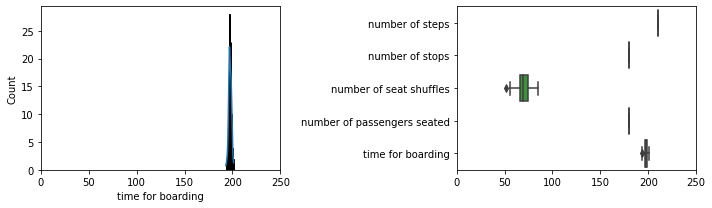

In [4]:
from functools import partial
@statistic
def ftb():
    airplane = Airplane(number_of_rows=ROWS, seats_per_row=SEATS_PER_ROW)
    sim = Simulation(airplane, FrontToBack, max_iter=1000)
    return sim.run()

ftb()

##### modified FrontToBack with 6 boarding groups

Note that as the number of boarding groups decreases, you approach random boarding performance.

number of steps                208.35
number of stops                124.10
number of seat shuffles         71.12
number of passengers seated    180.00
time for boarding              141.88
dtype: float64

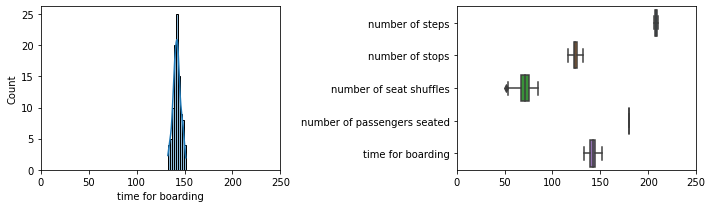

In [5]:
@statistic
def ftb6():
    airplane = Airplane(number_of_rows=ROWS, seats_per_row=SEATS_PER_ROW)
    sim = Simulation(airplane, partial(FrontToBack, groups=6), max_iter=1000)
    return sim.run()

ftb6()

### Back to front boarding

number of steps                181.0000
number of stops                151.0000
number of seat shuffles         69.3900
number of passengers seated    180.0000
time for boarding              168.3475
dtype: float64

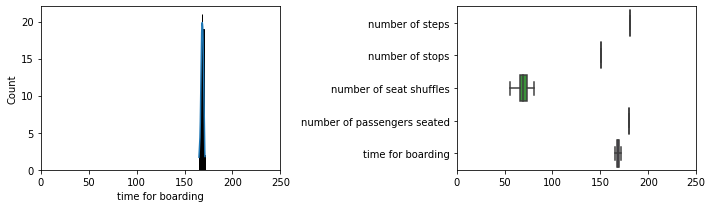

In [6]:
@statistic
def btf():
    airplane = Airplane(number_of_rows=ROWS, seats_per_row=SEATS_PER_ROW)
    sim = Simulation(airplane, BackToFront, max_iter=1000)
    return sim.run()

btf()

### Random boarding

number of steps                203.88
number of stops                117.18
number of seat shuffles         70.52
number of passengers seated    180.00
time for boarding              134.81
dtype: float64

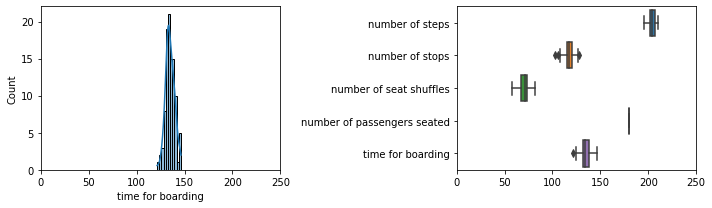

In [7]:
@statistic
def rand():
    airplane = Airplane(number_of_rows=ROWS, seats_per_row=SEATS_PER_ROW)
    sim = Simulation(airplane, Random, max_iter=1000)
    return sim.run()

rand()

### WindowMiddleAisle

number of steps                204.67
number of stops                117.79
number of seat shuffles          0.00
number of passengers seated    180.00
time for boarding              117.79
dtype: float64

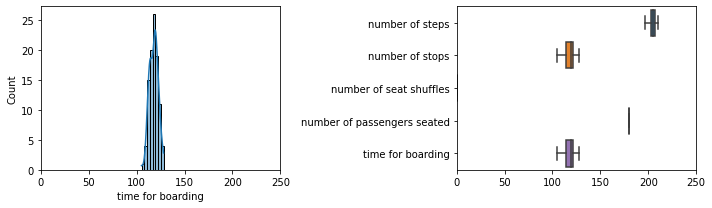

In [9]:
@statistic
def wma():
    airplane = Airplane(number_of_rows=ROWS, seats_per_row=SEATS_PER_ROW)
    sim = Simulation(airplane, WindowMiddleAisle, max_iter=1000)
    return sim.run()

wma()

### Steffen boarding (modified)

number of steps                203.6600
number of stops                117.8000
number of seat shuffles         71.4500
number of passengers seated    180.0000
time for boarding              135.6625
dtype: float64

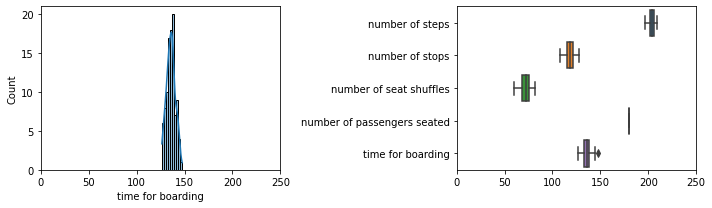

In [10]:
@statistic
def steffen():
    airplane = Airplane(number_of_rows=ROWS, seats_per_row=SEATS_PER_ROW)
    sim = Simulation(airplane, Steffen, max_iter=1000)
    return sim.run()

steffen()

### Steffen (perfect)

/Applications/anaconda3/envs/tensorflow_env/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


number of steps                181.0
number of stops                  6.0
number of seat shuffles          0.0
number of passengers seated    180.0
time for boarding                6.0
dtype: float64

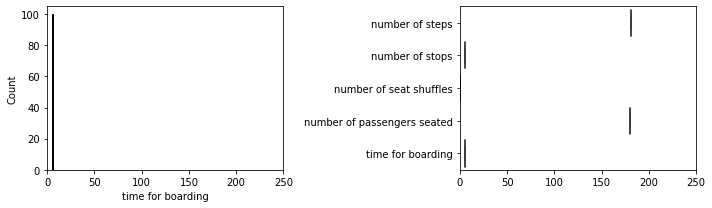

In [11]:
from functools import partial

@statistic
def steffen():
    airplane = Airplane(number_of_rows=ROWS, seats_per_row=SEATS_PER_ROW)
    sim = Simulation(airplane, partial(Steffen, perfect=True), max_iter=1000)
    return sim.run()

steffen()